# Problem Statement 2:
An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.
Dataset Information:
The **online_retail.csv** contains 387961 rows and 8 columns.

Feature Name - Description

1.Invoice -Invoice number
2.StockCode -Product ID
3.Description -Product Description
4.Quantity -Quantity of the product
5.InvoiceDate -Date of the invoice
6.Price -Price of the product per unit
7.CustomerID -Customer ID
8.Country -Region of Purchase

1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Capstone Project/OnlineRetail (3).csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 79780: invalid start byte

In [ ]:
# Try reading the CSV file with a different encoding
try:
    df = pd.read_csv('/content/drive/MyDrive/Capstone Project/OnlineRetail (3).csv', encoding='latin1')
    print("CSV file read successfully.")
except UnicodeDecodeError:
    print("Failed to read the CSV file with the default encoding.")

CSV file read successfully.


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Drop null values
df.dropna(inplace=True)


In [ ]:
df.shape

(406829, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Convert datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#Calculate 'TotalSales'
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

### Compute Customer Metrics

In [ ]:
#Total revenue per customer
customer_revenue = df.groupby('CustomerID')['TotalSales'].sum()
customer_revenue.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: TotalSales, dtype: float64

In [ ]:
#Total number of transactions per customer
customer_transactions = df.groupby('CustomerID').size()
customer_transactions.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
dtype: int64

In [ ]:
#Recency: Time since last purchase
from datetime import datetime
last_purchase=df.groupby('CustomerID')['InvoiceDate'].max()
last_purchase.head()

CustomerID
12346.0   2011-01-18 10:17:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
recency=(df['InvoiceDate'].max()-last_purchase).dt.days
recency.head()

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
Name: InvoiceDate, dtype: int64

In [ ]:
#Create a customer profile DataFrame
customer_profile = pd.DataFrame({
    'TotalRevenue': customer_revenue,
    'TotalTransactions': customer_transactions,
    'Recency': recency
}).reset_index()

In [ ]:
customer_profile.head()

,CustomerID,TotalRevenue,TotalTransactions,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


### Segment Customers with Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#Normalize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profile[['TotalRevenue', 'TotalTransactions', 'Recency']])

In [ ]:
#Apply K-Means Clustering
kmeans=KMeans(n_clusters=5,random_state=42)
customer_profile['Cluster']=kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#Analyze clusters
cluster_summary = customer_profile.groupby('Cluster').agg({
    'TotalRevenue': 'mean',
    'TotalTransactions': 'mean',
    'Recency': ['mean', 'min', 'max']
})
print(cluster_summary)

          TotalRevenue TotalTransactions     Recency          
                  mean              mean        mean  min  max
Cluster                                                       
0           466.381997         27.672575  248.581157  143  373
1          1299.610968         74.584918   42.227541    0  155
2         64776.602500       5914.000000    1.000000    0    3
3        192103.854000       1013.400000    8.000000    0   23
4         10857.531867        501.896266   11.373444    0  150


In [ ]:
#Analyze Geographical Insights
country_summary=df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
print(country_summary)

Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates

##
**Segment Analysis**:

High-Value Customers:
 High TotalRevenue, low Recency

Frequent Buyers:
High TotalTransactions, varied Recency

Recent Purchasers:
Low Recency, variable TotalRevenue and TotalTransactions

Infrequent Buyers:
 Low TotalTransactions, high Recency, variable TotalRevenue



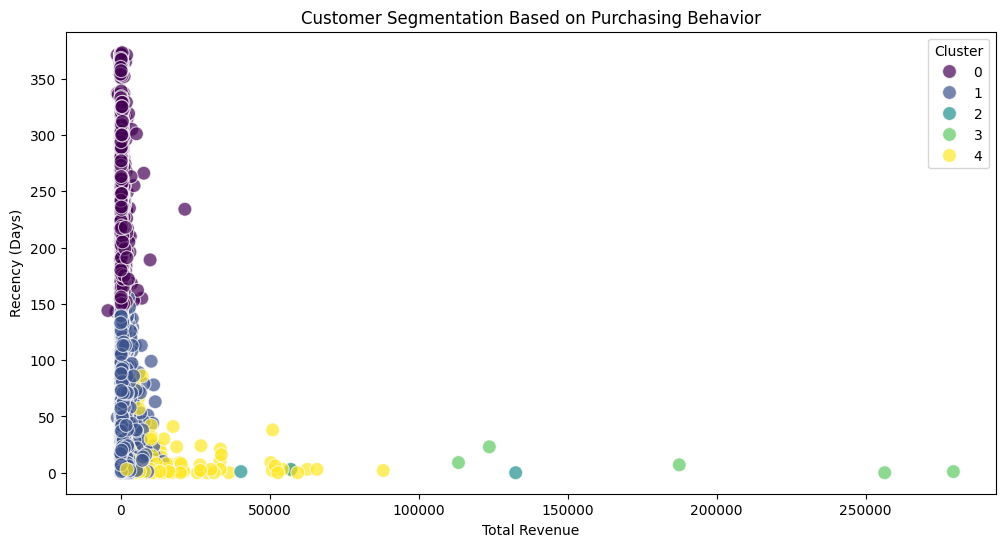

In [ ]:
# Visualizing customer segmentation
plt.figure(figsize=(12, 6))

# Scatter plot of customers colored by their cluster
sns.scatterplot(data=customer_profile, x='TotalRevenue', y='Recency', hue='Cluster', palette='viridis', s=100, alpha=0.7)

plt.title('Customer Segmentation Based on Purchasing Behavior')
plt.xlabel('Total Revenue')
plt.ylabel('Recency (Days)')
plt.legend(title='Cluster')
plt.show()


#
**c. Geographic Insights**:

Analyze purchasing patterns by Country to tailor regional marketing strategies.

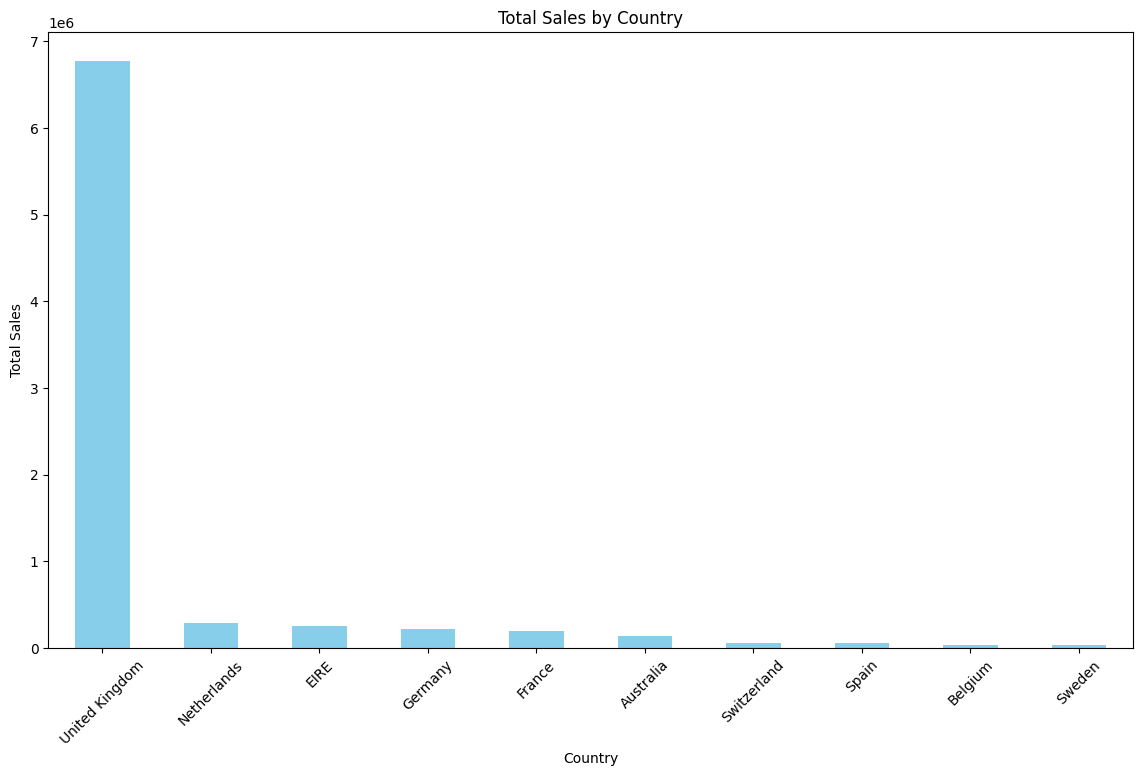

In [ ]:
# Summarize sales by country
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))

# Bar plot of total sales by country
country_sales.plot(kind='bar', color='skyblue')

plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Visualization of High value customers
# Define thresholds
revenue_threshold = customer_profile['TotalRevenue'].quantile(0.90)
recency_threshold = customer_profile['Recency'].quantile(0.50)

# Filter high-value customers
high_value_customers = customer_profile[
    (customer_profile['TotalRevenue'] >= revenue_threshold) &
    (customer_profile['Recency'] <= recency_threshold)
]


In [ ]:
#Top ten high value customers
high_value_customers.sort_values(by='TotalRevenue', ascending=False).head(10)

,CustomerID,TotalRevenue,TotalTransactions,Recency,Cluster
1703,14646.0,279489.02,2085,1,3
4233,18102.0,256438.49,433,0,3
3758,17450.0,187482.17,351,7,3
1895,14911.0,132572.62,5903,0,2
55,12415.0,123725.45,778,23,3
1345,14156.0,113384.14,1420,9,3
3801,17511.0,88125.38,1076,2,4
3202,16684.0,65892.08,281,3,4
1005,13694.0,62653.10,585,3,4
2192,15311.0,59419.34,2491,0,4


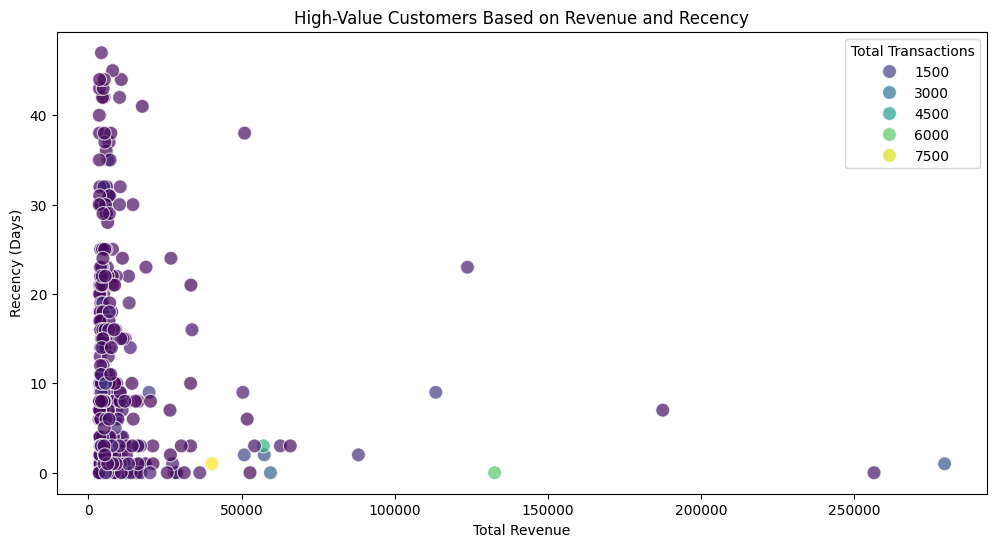

In [ ]:
# Visualizing high-value customers
plt.figure(figsize=(12, 6))

# Scatter plot of high-value customers
sns.scatterplot(data=high_value_customers, x='TotalRevenue', y='Recency', hue='TotalTransactions', palette='viridis', s=100, alpha=0.7)

plt.title('High-Value Customers Based on Revenue and Recency')
plt.xlabel('Total Revenue')
plt.ylabel('Recency (Days)')
plt.legend(title='Total Transactions')
plt.show()


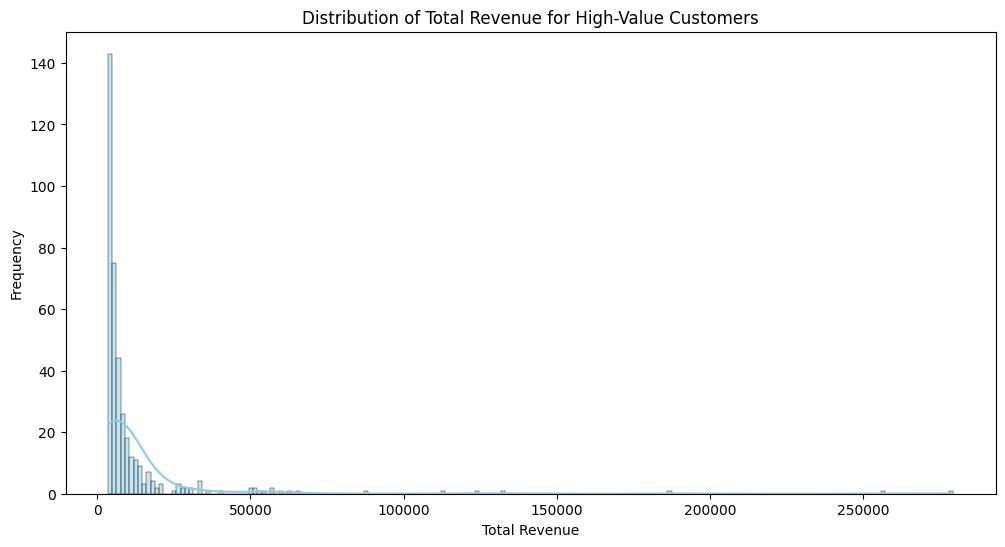

In [ ]:
# Distribution plot for Total Revenue of high-value customers
plt.figure(figsize=(12, 6))

sns.histplot(high_value_customers['TotalRevenue'], kde=True, color='skyblue')

plt.title('Distribution of Total Revenue for High-Value Customers')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()


## **Marketing Strategies Recommendation**:

**High-Value Customers**:
 Offer loyalty rewards, exclusive promotions.

**Frequent Buyers**:
 Introduce subscription models, cross-sell complementary products.

**Recent Purchasers**:
 Send follow-up offers to encourage repeat purchases.

**Infrequent Buyers**:
Implement re-engagement campaigns, special discounts.